<a href="https://colab.research.google.com/github/satishgunjal/Machine-Learning-Using-Python/blob/master/01_Linear_Regression/Linear_Regression_One_Variable.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Import required libraries
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt

In [0]:
# Below code will work in case Jupytor is running locally and files are on same PC
#df = pd.read_csv('homeprices.csv')
#df

In [4]:
from google.colab import files
uploaded = files.upload()

Saving homeprices.csv to homeprices.csv


In [6]:
import io

df = pd.read_csv(io.StringIO(uploaded['homeprices.csv'].decode('utf-8')))
df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


In [0]:
# Lets plot scatter plot using 'matplotlib' library

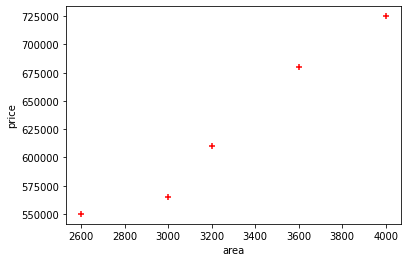

In [8]:
plt.xlabel('area')
plt.ylabel('price')
plt.scatter(df.area,df.price, color = 'red', marker = '+')